In [249]:
# autoři: Jan Kubát, Jan Matějka

In [250]:
# importy potřebných knihoven
import pandas
import scipy
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from operator import itemgetter
from collections import Counter
import copy

In [251]:
# výpočet hodnot pro vstupní data
K = 1 # TODO nutné upravit podle dne narození
L = len("Kubát")
X = ((K*L*23) % 20) + 1
Y = ((X + ((K*5 + L*7) % 19)) % 20) + 1

In [252]:
# 1. Z obou datových souborů načtěte texty k analýze. Pro každý text zvlášť odhadněte základní 
#    charakteristiky délek slov, tj. střední hodnotu a rozptyl. Graficky znázorněte rozdělení délek slov.

# X)
# parsování vstupního souboru
d = list()
with open("hw1-source/0" + str(X) + ".txt") as f:
    for line in f:
        d.append(line)
        
# vytvoření kolekce slov s jejich délkou
words = d[1].split(" ")
words_with_len = list()
for word in words:
    words_with_len.append((len(word), word))

# vytvoření datové struktury k pohodlné práci s daty
data = pandas.DataFrame([{'word_length': a, 'word': b}
                  for a, b in words_with_len
                  if True])
print("Prvních 20 slov v odstavci:")
print(data[:20])

# příprava dat pro histogram
data_grouped = data.groupby('word_length').count()

Prvních 20 slov v odstavci:
            word  word_length
0            the            3
1       republic            8
2        persons            7
3             of            2
4            the            3
5       dialogue            8
6       socrates            8
7            who            3
8             is            2
9            the            3
10      narrator            8
11       glaucon            7
12    adeimantus           10
13   polemarchus           11
14      cephalus            8
15  thrasymachus           12
16    cleitophon           10
17           and            3
18        others            6
19           who            3


In [253]:
print('Střední hodnota: ' + str(np.mean(data['word_length'])))
print('Rozptyl: ' + str(np.var(data['word_length'])))

Střední hodnota: 4.0856
Rozptyl: 5.15507264


[ 60. 236. 355. 226. 111.  56.  79.  54.  31.  18.  17.   7.]


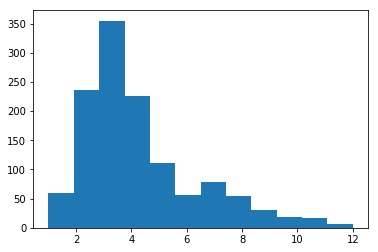

In [254]:
# zobrazeni histogramu pro hodnotu X
N, bins, patches = plt.hist(data['word_length'], bins=len(data_grouped), density = False)
print(N)

In [255]:
# Y)
# parsování vstupního souboru
d = list()
with open("hw1-source/0" + str(Y) + ".txt") as f:
    for line in f:
        d.append(line)
        
# vytvoření kolekce slov s jejich délkou
words = d[1].split(" ")
words_with_len = list()
for word in words:
    words_with_len.append((len(word), word))

# vytvoření datové struktury k pohodlné práci s daty
data = pandas.DataFrame([{'word_length': a, 'word': b}
                  for a, b in words_with_len
                  if True])
print("Prvních 20 slov v odstavci:")
print(data[:20])

# příprava dat pro histogram
data_grouped = data.groupby('word_length').count()

Prvních 20 slov v odstavci:
         word  word_length
0     preface            7
1          to            2
2   pygmalion            9
3           a            1
4   professor            9
5          of            2
6   phonetics            9
7          as            2
8        will            4
9          be            2
10       seen            4
11      later            5
12         on            2
13  pygmalion            9
14      needs            5
15        not            3
16          a            1
17    preface            7
18        but            3
19          a            1


In [256]:
print('Střední hodnota: ' + str(np.mean(data['word_length'])))
print('Rozptyl: ' + str(np.var(data['word_length'])))

Střední hodnota: 4.643589743589744
Rozptyl: 6.824253780407627


[ 62. 210. 236. 149. 138.  92.  95.  61.  61.  37.  19.   7.   2.   1.]


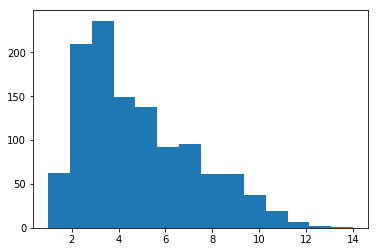

In [257]:
# zobrazeni histogramu pro hodnotu Y
N, bins, patches = plt.hist(data['word_length'], bins=len(data_grouped), density = False)
print(N)

In [258]:
# 2. Pro každý text zvlášť odhadněte pravděpodobnosti písmen (symbolů mimo mezery), které se v textech vyskytují. 
#    Výsledné pravděpodobnosti graficky znázorněte.

# X)
# parsování vstupního souboru
d = list()
with open("hw1-source/0" + str(X) + ".txt") as f:
    for line in f:
        d.append(line)
        
# vytvoření kolekce slov s jejich délkou
string = d[1].replace(" ", "")

# třída Counter ze vstupního řetězce spočítá četnost jednotlivých znaků
c = Counter(string)

# vytvoření datové struktury k pohodlné práci s daty
data = pandas.DataFrame([{'count': a, 'letter': b}
                  for b, a in sorted(c.most_common(), key = lambda val : val[0])
                  if True])
print("Výčet znaků (bez mezery) a jejich četnost:")
print(data)

suma = sum(data['count'])
print('\nSoučet počtu písmen řetězce: ', suma )

rel_data = copy.deepcopy(data)
rel_data['count'] = (data['count'] / suma) * 100

print('\nVýčet znaků (bez mezery) a jejich relativní četnost v (%):')
print(rel_data)

Výčet znaků (bez mezery) a jejich četnost:
    count letter
0     455      a
1      58      b
2     151      c
3     205      d
4     638      e
5     100      f
6      91      g
7     344      h
8     321      i
9       2      j
10     21      k
11    192      l
12    135      m
13    310      n
14    427      o
15     91      p
16      8      q
17    284      r
18    331      s
19    453      t
20    189      u
21     36      v
22    132      w
23      2      x
24    131      y

Součet počtu písmen řetězce:  5107

Výčet znaků (bez mezery) a jejich relativní četnost v (%):
        count letter
0    8.909340      a
1    1.135696      b
2    2.956726      c
3    4.014098      d
4   12.492657      e
5    1.958097      f
6    1.781868      g
7    6.735853      h
8    6.285491      i
9    0.039162      j
10   0.411200      k
11   3.759546      l
12   2.643431      m
13   6.070100      n
14   8.361073      o
15   1.781868      p
16   0.156648      q
17   5.560995      r
18   6.481300      s

Text(0.5, 0, "Index of letters from 'a'=0 to 'z'=25")

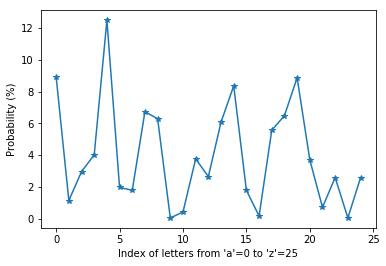

In [259]:
# zobrazeni grafu pro hodnotu X
plt.plot(rel_data['count'], '*-')
plt.ylabel('Probability (%)')
plt.xlabel('Index of letters from \'a\'=0 to \'z\'=25')

In [260]:
# Y)
# parsování vstupního souboru
d = list()
with open("hw1-source/0" + str(Y) + ".txt") as f:
    for line in f:
        d.append(line)
        
# vytvoření kolekce slov s jejich délkou
string = d[1].replace(" ", "")

# třída Counter ze vstupního řetězce spočítá četnost jednotlivých znaků
c = Counter(string)

# vytvoření datové struktury k pohodlné práci s daty
data = pandas.DataFrame([{'count': a, 'letter': b}
                  for b, a in sorted(c.most_common(), key = lambda val : val[0])
                  if True])
print("Výčet znaků (bez mezery) a jejich četnost:")
print(data)

suma = sum(data['count'])
print('\nSoučet počtu písmen řetězce: ', suma )

rel_data = copy.deepcopy(data)
rel_data['count'] = (data['count'] / suma) * 100

print('\nVýčet znaků (bez mezery) a jejich relativní četnost v (%):')
print(rel_data)

Výčet znaků (bez mezery) a jejich četnost:
    count letter
0     443      a
1      95      b
2     159      c
3     178      d
4     669      e
5      96      f
6      95      g
7     326      h
8     425      i
9      11      j
10     29      k
11    239      l
12    140      m
13    382      n
14    366      o
15    147      p
16     10      q
17    298      r
18    374      s
19    487      t
20    156      u
21     55      v
22    112      w
23     21      x
24    109      y
25     11      z

Součet počtu písmen řetězce:  5433

Výčet znaků (bez mezery) a jejich relativní četnost v (%):
        count letter
0    8.153874      a
1    1.748574      b
2    2.926560      c
3    3.276275      d
4   12.313639      e
5    1.766980      f
6    1.748574      g
7    6.000368      h
8    7.822566      i
9    0.202466      j
10   0.533775      k
11   4.399043      l
12   2.576845      m
13   7.031106      n
14   6.736610      o
15   2.705687      p
16   0.184060      q
17   5.484999      r
18 

Text(0.5, 0, "Index of letters from 'a'=0 to 'z'=25")

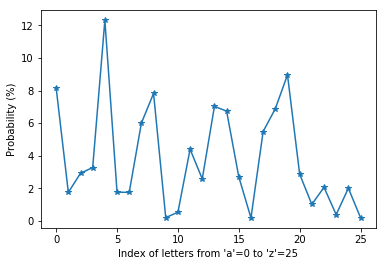

In [261]:
# zobrazeni grafu pro hodnotu Y
plt.plot(rel_data['count'], '*-')
plt.ylabel('Probability (%)')
plt.xlabel('Index of letters from \'a\'=0 to \'z\'=25')

In [262]:
# 3. Na hladině významnosti 5% otestujte hypotézu, že rozdělení délek slov nezávisí na tom, o který jde text. 
#    Určete také p-hodnotu testu.

# X)